1. Generate expert dataset from csv file

In [ ]:
import pandas as pd
from tianshou.data import ReplayBuffer, Batch
import numpy as np
import pickle
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('pendulum_data_new.csv')

# Initialize the Replay Buffer
buffer_size = len(df)
expert_buffer = ReplayBuffer(buffer_size)

# Populate the Replay Buffer
for i in range(buffer_size):
    obs = np.array(df.loc[i, 'observations'][1:-1].split(', '), dtype=float)
    act = np.array([df.loc[i, 'actions']], dtype=float)
    rew = df.loc[i, 'rewards']
    done = df.loc[i, 'terminals']
    next_obs = np.array(df.loc[i, 'next_observations'][1:-1].split(', '), dtype=float)
    
    # Assuming no truncation information is available, use the done flag for terminated
    # and False for truncated (change this based on your specific case)
    terminated = done
    truncated = False

    expert_buffer.add(
        Batch(
            obs=obs,
            act=act,
            rew=rew,
            done=done,
            obs_next=next_obs,
            terminated=terminated,
            truncated=truncated
        )
    )
print("Data loaded into Tianshou Replay Buffer.")

Check data format in csv file (obsolete)

In [ ]:
# Process and save the data
transition_data = []
for i in range(len(expert_buffer)):
    transition = expert_buffer[i]
    print("--- Transition {} ---".format(i))
    print(transition.obs)
    print(transition.act)
    print(transition.rew)
    print(transition.done)
    print(transition.obs_next)
    print("--- End of Transition {} ---".format(i))
    transition_data.append(
        Batch(
            obs=transition.obs,
            act=transition.act,
            rew=transition.rew,
            done=transition.done,
            obs_next=transition.obs_next
        )
    )

Save dataset to pickle file

In [ ]:
# Test saving the data to a pickle file
with open("test_expert_dataset.pkl", "wb") as f:
    pickle.dump(expert_buffer, f)
    print("Data saved to test_expert_dataset.pkl")

Check dataset structure

In [ ]:
# expert_buffer._meta
# print(expert_buffer._meta)
print(expert_buffer._meta.__dict__.keys())
print(expert_buffer._reserved_keys)
# expert_buffer_act = expert_buffer._meta.__dict__['act'].astype(np.float32)
# print(expert_buffer_act)

2. Check data format in read from pickle file

In [427]:
import pandas as pd
from tianshou.data import ReplayBuffer, Batch
import numpy as np
import pickle
import matplotlib.pyplot as plt

def load_buffer(file_name):
    try:
        with open(file_name, "rb") as f:
            buffer = pickle.load(f)
        print("Loaded expert buffer from {}".format(file_name))
        return buffer
    except FileNotFoundError:
        print("File not found: {}".format(file_name))
        return None
    except Exception as e:
        print("An error occurred while loading the buffer: {}".format(e))
        return None

# Specify the file name directly
# file_name = "expert_SAC_Pendulum-v1.pkl"
file_name = r"expert_MPC_PH96_12345_combined_50_new.pkl"

# Load the buffer
buffer = load_buffer(file_name)

# Print the attributes of the buffer
print(buffer.maxsize)
print(buffer._meta.__dict__.keys())
print(buffer._meta.__dict__['obs'].astype(np.float32))

# Chech the range of observations, maximum and minimum values in obeervations
print(np.max(buffer._meta.__dict__['obs'].astype(np.float32)))
print(np.min(buffer._meta.__dict__['obs'].astype(np.float32)))

# Plot the first element of the observations
# plt.plot(buffer._meta.__dict__['obs'].astype(np.float32)[:,0])
# plt.show()

# Plot the rewards
# plt.plot(buffer._meta.__dict__['rew'].astype(np.float32))
# plt.show()

# Sum up the rewards
print(np.sum(buffer._meta.__dict__['rew'].astype(np.float32)))

Loaded expert buffer from expert_MPC_PH96_12345_combined_50_new.pkl
33600
dict_keys(['obs', 'act', 'rew', 'terminated', 'truncated', 'done', 'obs_next', 'info', 'policy'])
[[    0.        298.15      293.15    ...     0.          0.
      0.     ]
 [  900.        296.4429    293.00803 ...     0.          0.
      0.     ]
 [ 1800.        294.03415   292.85    ...     0.          0.
    137.08131]
 ...
 [83700.        297.45987   298.61798 ...   406.64517   402.3931
    475.3044 ]
 [84600.        297.09598   298.47336 ...   402.3931    475.3044
    478.2642 ]
 [85500.        296.87952   298.31708 ...   475.3044    478.2642
    515.8788 ]]
85500.0
0.0
-29606.557


In [18]:
import pickle
from tianshou.data import ReplayBuffer

# Load the pickle file
file_name = "expert_SAC_JModelicaCSSingleZoneEnv-action-v2.pkl" 
# file_name1 = "expert_SAC_JModelicaCSSingleZoneEnv-action-v2.pkl"
file_name1 = "expert_buffer_MPC_JModelicaCSSingleZoneEnv-action-v2-PH96.pkl"

with open(file_name, "rb") as f:
    loaded_data = pickle.load(f)
with open(file_name1, "rb") as f:
    loaded_data1 = pickle.load(f)

# Initialize the Replay Buffer
buffer_size = len(loaded_data)
expert_buffer = ReplayBuffer(buffer_size)
buffer_size1 = len(loaded_data1)
expert_buffer1 = ReplayBuffer(buffer_size1)

# Populate the Replay Buffer
for data in loaded_data:
    # If data is already a Batch object or similar
    expert_buffer.add(data)
    # If data is not a Batch object, you need to convert it. Example:
    # expert_buffer.add(
    #     Batch(
    #         obs=data['obs'],
    #         act=data['act'],
    #         rew=data['rew'],
    #         done=data['done'],
    #         obs_next=data['obs_next'],
    #         terminated=data.get('terminated', data['done']),  # Use 'done' if 'terminated' is not available
    #         truncated=data.get('truncated', False)  # Default to False if not available
    #     )
    # )

for data in loaded_data1:
    # If data is already a Batch object or similar
    expert_buffer1.add(data)

print("Data loaded into Tianshou Replay Buffer.")

Data loaded into Tianshou Replay Buffer.


In [19]:
from tianshou.utils.statistics import RunningMeanStd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# rms = RunningMeanStd()

# Update running mean and standard deviation based on the observations
# obs_array = expert_buffer._meta.__dict__['obs']  # Extract observations as ndarray
# rms.update(obs_array)
# # Normalize the observations
# normalized_obs = rms.norm(obs_array)
# # Replace the original observations with normalized observations
# expert_buffer._meta.__dict__['obs'] = normalized_obs

# # Update running mean and standard deviation based on the next observations
# obs_next_array = expert_buffer._meta.__dict__['obs_next']  # Extract observations as ndarray
# rms.update(obs_next_array)
# # Normalize the observations
# normalized_obs_next = rms.norm(obs_next_array)
# # Replace the original observations with normalized observations
# expert_buffer._meta.__dict__['obs_next'] = normalized_obs_next


# Print the attributes of the buffer
print(expert_buffer._meta.__dict__.keys())
# expert_buffer._meta.__dict__['obs_next'][-1][0] = 86400.0
# print(expert_buffer._meta.__dict__['obs'].astype(np.float32))

# Print each transition's first element of the observations, then combine them into a list
time_index_mpc = []
for i in range(len(expert_buffer1)):
    time_index_mpc.append(expert_buffer1[i].act[0])
    # print(expert_buffer1[i].obs[0])
print(time_index_mpc)

time_index_ppo = []
for i in range(len(expert_buffer)):
    time_index_ppo.append(expert_buffer[i].act[0])
    # print(expert_buffer[i].obs[0])
print(time_index_ppo)

diff = []
for i in range(len(expert_buffer)):
    diff.append(time_index_mpc[i] - time_index_ppo[i])
print(diff)

# Save time_index_mpc and time_index_ppo to a csv file
df = pd.DataFrame({'time_index_mpc': time_index_mpc, 'time_index_ppo': time_index_ppo, 'diff': diff})
df.to_csv('sac_mpc_act.csv', index=False)

# # Plot time_index_mpc and time_index_ppo to compare
# plt.plot(time_index_mpc, label='MPC')
# plt.plot(time_index_ppo, label='PPO')
# plt.plot(diff, label='MPC - PPO')
# plt.legend()
# plt.show()

# print(expert_buffer._meta.__dict__['obs_next'].astype(np.float32))
# print(len(expert_buffer._meta.__dict__['obs'].astype(np.float32)))
# print(len(expert_buffer._meta.__dict__['obs_next'].astype(np.float32)))

# Calculate the total reward
print(np.sum(expert_buffer._meta.__dict__['rew'].astype(np.float32)))

# Save the expert buffer to a pickle file with customised name
# file_name = "expert_buffer_MPC_JModelicaCSSingleZoneEnv-action-v2-PH32.pkl"
# with open(file_name, "wb") as f:
#     pickle.dump(expert_buffer, f)
#     print("Data saved to {}".format(file_name))

dict_keys(['obs', 'act', 'rew', 'terminated', 'truncated', 'done', 'obs_next', 'info', 'policy'])
[-0.8408668539999999, -0.392753628, -0.149741868, -0.03710232999999996, 0.03738848799999994, 0.15675841599999996, 0.31798382000000003, 0.34128501199999994, 0.41966928400000003, 0.479603392, 0.4426374660000001, 0.42584309200000003, 0.38345855800000006, 0.3398245120000001, 0.2603038660000001, 0.19617380799999995, 0.001127308000000049, -0.10563006200000002, -0.277367778, -0.373400736, -0.40418044399999997, -0.620184794, -0.73244508, -0.78367696, -0.881286886, -0.897891028, -0.956154022, -0.99999624, -1.0, -0.90701029, -0.884913108, -0.8736264380000001, -0.879595468, -0.828424788, -0.8349193420000001, -0.788427934, -0.800284042, -0.770431374, -0.78034325, -0.772015302, -0.750945938, -0.73680981, -0.7152811139999999, -0.708469192, -0.690732174, -0.695248756, -0.658797428, -0.6477446339999999, -0.631956134, -0.627519478, -0.62844809, -0.6301257060000001, -0.632564098, -0.635797152, -0.6375998780

In [ ]:
# Plot the diff
plt.plot(diff)
plt.show()

Combine two datasets

In [409]:
# Load the ReplayBuffers from pickle files

with open("expert_MPC_PH96_004_combined.pkl", "rb") as f:
    buffer1 = pickle.load(f)

with open("expert_MPC_JModelicaCSSingleZoneEnv-action-v2-PH96.pkl", "rb") as f:
    buffer2 = pickle.load(f)
# expert_MPC_JModelicaCSSingleZoneEnv-action-v2-PH96
# expert_MPC_JModelicaCSSingleZoneEnv-action-v2-PH48
# expert_MPC_JModelicaCSSingleZoneEnv-action-v2-PH32
    
# with open("expert_MPC_PH32-48-96_005_combined_30.pkl", "rb") as f:
    # buffer3 = pickle.load(f)

# with open("expert_buffer_MPC_JModelicaCSSingleZoneEnv-action-v2-PH8.pkl", "rb") as f:
#     buffer4 = pickle.load(f)

# Create a new ReplayBuffer with enough size
combined_buffer = ReplayBuffer(size=len(buffer1) + len(buffer2) 
                            #    + len(buffer3) 
                            #    + len(buffer4)
                               )

# Add experiences from the first buffer
for experience in buffer1:
    combined_buffer.add(experience)

# Add experiences from the second buffer
for experience in buffer2:
    combined_buffer.add(experience)

# Add experiences from the third buffer
# for experience in buffer3:
#     combined_buffer.add(experience)

# # Add experiences from the fourth buffer
# for experience in buffer4:
#     combined_buffer.add(experience)

# Print message to confirm the buffer is loaded
print("Data loaded into Tianshou Replay Buffer.")

print(combined_buffer._meta.__dict__['obs'].astype(np.float32))
# print(len(combined_buffer._meta.__dict__['obs'].astype(np.float32)))
# print(len(combined_buffer._meta.__dict__['obs_next'].astype(np.float32)))

# Calculate the total reward and compare with the original buffer
print(np.sum(combined_buffer._meta.__dict__['rew'].astype(np.float32)))
print(np.sum(buffer1._meta.__dict__['rew'].astype(np.float32)) 
      + np.sum(buffer2._meta.__dict__['rew'].astype(np.float32)) 
    #   + np.sum(buffer3._meta.__dict__['rew'].astype(np.float32)) 
    #   + np.sum(buffer4._meta.__dict__['rew'].astype(np.float32))
      )

# Save the expert buffer to a pickle file with customised name
file_name = "expert_MPC_PH96_004_1-10_new.pkl"
with open(file_name, "wb") as f:
    pickle.dump(combined_buffer, f)
    print("Data saved to {}".format(file_name))

Data loaded into Tianshou Replay Buffer.
[[    0.        298.15      293.15    ...     0.          0.
      0.     ]
 [  900.        296.5867    293.00803 ...     0.          0.
      0.     ]
 [ 1800.        293.84265   292.85    ...     0.          0.
    119.96541]
 ...
 [83700.        297.45987   298.61798 ...   406.64517   402.3931
    475.3044 ]
 [84600.        297.09598   298.47336 ...   402.3931    475.3044
    478.2642 ]
 [85500.        296.87952   298.31708 ...   475.3044    478.2642
    515.8788 ]]
-6086.798
-6086.798
Data saved to expert_MPC_PH96_004_1-10_new.pkl


Combine 10 buffers

In [364]:
import pickle
import numpy as np

# Assuming ReplayBuffer is already defined or imported

# Generate file names dynamically
file_names = [f"expert_MPC_PH48_004_{i}.pkl" for i in range(1, 5)]

# Load the ReplayBuffers from pickle files
buffers = []
total_size = 0
for file_name in file_names:
    with open(file_name, "rb") as f:
        buffer = pickle.load(f)
        buffers.append(buffer)
        total_size += len(buffer)

# Create a new ReplayBuffer with enough size
combined_buffer = ReplayBuffer(size=total_size)

# Add experiences from each buffer
for buffer in buffers:
    for experience in buffer:
        combined_buffer.add(experience)

# Print message to confirm the buffer is loaded
print("Data loaded into Tianshou Replay Buffer.")

# Assuming you need to access these attributes in a specific way
print(combined_buffer._meta.__dict__['obs'].astype(np.float32))

# Calculate and print the total reward
total_reward = np.sum([np.sum(buffer._meta.__dict__['rew'].astype(np.float32)) for buffer in buffers])
print(total_reward)

# Uncomment to save the combined buffer to a pickle file
file_name = "expert_MPC_PH48_004_combined-1-4.pkl"
with open(file_name, "wb") as f:
    pickle.dump(combined_buffer, f)
    print("Data saved to {}".format(file_name))

Data loaded into Tianshou Replay Buffer.
[[0.0000000e+00 2.9814999e+02 2.9314999e+02 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [9.0000000e+02 2.9573938e+02 2.9300803e+02 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [1.8000000e+03 2.9526178e+02 2.9285001e+02 ... 0.0000000e+00
  0.0000000e+00 2.2325789e+02]
 ...
 [8.3700000e+04 3.0106653e+02 2.9861798e+02 ... 1.5718550e+02
  2.9292150e+01 7.8381921e+02]
 [8.4600000e+04 3.0106247e+02 2.9847336e+02 ... 2.9292150e+01
  7.8381921e+02 4.5194626e+01]
 [8.5500000e+04 3.0039072e+02 2.9831708e+02 ... 7.8381921e+02
  4.5194626e+01 2.2200731e+02]]
-2507.7546
Data saved to expert_MPC_PH48_004_combined-1-4.pkl


In [422]:
# Load the ReplayBuffers from pickle files

with open("expert_MPC_PH96_001003005_combined_30_new.pkl", "rb") as f:
    buffer1 = pickle.load(f)

with open("expert_MPC_PH96_002_1-10_new.pkl", "rb") as f:
    buffer2 = pickle.load(f)
# expert_MPC_JModelicaCSSingleZoneEnv-action-v2-PH96
# expert_MPC_JModelicaCSSingleZoneEnv-action-v2-PH48
# expert_MPC_JModelicaCSSingleZoneEnv-action-v2-PH32
    
with open("expert_MPC_PH96_004_1-10_new.pkl", "rb") as f:
    buffer3 = pickle.load(f)

# with open("expert_buffer_MPC_JModelicaCSSingleZoneEnv-action-v2-PH8.pkl", "rb") as f:
#     buffer4 = pickle.load(f)

# Create a new ReplayBuffer with enough size
combined_buffer = ReplayBuffer(size=len(buffer1) + len(buffer2) 
                               + len(buffer3) 
                            #    + len(buffer4)
                               )

# Add experiences from the first buffer
for experience in buffer1:
    combined_buffer.add(experience)

# Add experiences from the second buffer
for experience in buffer2:
    combined_buffer.add(experience)

# Add experiences from the third buffer
for experience in buffer3:
    combined_buffer.add(experience)

# # Add experiences from the fourth buffer
# for experience in buffer4:
#     combined_buffer.add(experience)

# Print message to confirm the buffer is loaded
print("Data loaded into Tianshou Replay Buffer.")

print(combined_buffer._meta.__dict__['obs'].astype(np.float32))
# print(len(combined_buffer._meta.__dict__['obs'].astype(np.float32)))
# print(len(combined_buffer._meta.__dict__['obs_next'].astype(np.float32)))

# Calculate the total reward and compare with the original buffer
print(np.sum(combined_buffer._meta.__dict__['rew'].astype(np.float32)))
print(np.sum(buffer1._meta.__dict__['rew'].astype(np.float32)) 
      + np.sum(buffer2._meta.__dict__['rew'].astype(np.float32)) 
      + np.sum(buffer3._meta.__dict__['rew'].astype(np.float32)) 
    #   + np.sum(buffer4._meta.__dict__['rew'].astype(np.float32))
      )

# Save the expert buffer to a pickle file with customised name
file_name = "expert_MPC_PH96_12345_combined_50_new.pkl"
with open(file_name, "wb") as f:
    pickle.dump(combined_buffer, f)
    print("Data saved to {}".format(file_name))

Data loaded into Tianshou Replay Buffer.
[[    0.        298.15      293.15    ...     0.          0.
      0.     ]
 [  900.        296.4429    293.00803 ...     0.          0.
      0.     ]
 [ 1800.        294.03415   292.85    ...     0.          0.
    137.08131]
 ...
 [83700.        297.45987   298.61798 ...   406.64517   402.3931
    475.3044 ]
 [84600.        297.09598   298.47336 ...   402.3931    475.3044
    478.2642 ]
 [85500.        296.87952   298.31708 ...   475.3044    478.2642
    515.8788 ]]
-29606.557
-29606.555
Data saved to expert_MPC_PH96_12345_combined_50_new.pkl


Test normalization of time index

In [ ]:
sequence = np.arange(900, 86400, 900)
print(sequence)
rms = RunningMeanStd()
rms.update(sequence)
normalized_sequence = rms.norm(sequence)
print(normalized_sequence)

In [ ]:
# Test saving the data to a pickle file
with open("test_expert_dataset_Pendulum-v1.pkl", "wb") as f:
    pickle.dump(expert_buffer, f)
    print("Data saved to test_expert_dataset_Pendulum-v1.pkl")

Generate vectortized reply buffer from pickle file (Need fix, since saved pickle file can not be used in gail)

In [ ]:
from tianshou.data import VectorReplayBuffer, ReplayBuffer
import pickle

# Load the pickle file
file_name = "expert_SAC_Pendulum-v1.pkl"  # Replace with your pickle file name
with open(file_name, "rb") as f:
    original_vector_buffer = pickle.load(f)

# Initialize a new VectorReplayBuffer with the same number of buffers and buffer size
num_buffers = len(original_vector_buffer.buffers)
print("Number of buffers: {}".format(num_buffers))
buffer_size = len(original_vector_buffer)
print("Buffer size: {}".format(buffer_size))
new_vector_buffer = VectorReplayBuffer(buffer_size, num_buffers)

# Populate the new VectorReplayBuffer
for buf_index, buf in enumerate(original_vector_buffer.buffers):
    for transition in buf:
        # Add directly to the corresponding buffer
        new_vector_buffer.buffers[buf_index].add(transition)

print("Data loaded into new VectorReplayBuffer.")

In [ ]:
# Number of buffers
# num_buffers = 16

# Initialize individual replay buffers
# Assuming all buffers have the same size, e.g., 1000
# buffers = [original_vector_buffer for _ in range(num_buffers)]

# Create a VectorReplayBuffer instance with the list of buffers
# vector_buffer = VectorReplayBuffer(buffers, buffer_num=num_buffers)

# Now the vector_buffer is ready to use
# print(vector_buffer)

new_vector_buffer
# original_vector_buffer

In [ ]:
new_vector_buffer

# Print the attributes of the buffer
print(new_vector_buffer.buffers[15]._meta.__dict__.keys())
# print(new_vector_buffer._meta.__dict__['obs'].astype(np.float32))

# print('====Fowlloing is for checking====')
# # Example: Inspecting the first few transitions in each sub-buffer
# for buf_index, buf in enumerate(new_vector_buffer.buffers):
#     print(f"Buffer {buf_index}:")
#     for i in range(min(len(buf), 5)):  # Print first 5 transitions of each buffer
#         transition = buf[i]
#         print(f"  Transition {i}: {transition}")
#     print()  # Blank line for readability

In [ ]:
# Test saving the data to a pickle file
with open("test_vector_expert_dataset_Pendulum-v1.pkl", "wb") as f:
    pickle.dump(new_vector_buffer, f)
    print("Data saved to test_vector_expert_dataset_Pendulum-v1.pkl")

Read expert dataset from saved pickle file

In [ ]:
import pickle
# from tianshou.data import VectorReplayBuffer  # Uncomment if needed

# Path to your pickle file containing the VectorReplayBuffer
pickle_file_path = 'expert_SAC_Pendulum-v1.pkl'

# Load the buffer from the pickle file
with open(pickle_file_path, 'rb') as file:
    buffer = pickle.load(file) # vectorized replay buffer, a VectorReplayBuffer object (used for the next two cells)
    buffer = buffer.buffers[0] # One of the replay buffers in the vectorized replay buffer (used for this cell only)

# Print the buffer metadata
print(dir(buffer)) 

# Print the keys of the metadata
print(buffer._meta.__dict__.keys())

# Check and print if done and truncated and terminated are all False, print the index that is True
# for i in range(len(buffer)):
#     if buffer._meta.__dict__['done'][i] or buffer._meta.__dict__['truncated'][i] or buffer._meta.__dict__['terminated'][i]:
#         print(i)
#         print(buffer._meta.__dict__['done'][i])
#         print(buffer._meta.__dict__['truncated'][i])
#         print(buffer._meta.__dict__['terminated'][i])
#         break

# Print the index of true in the done, truncated and terminated
print(np.where(buffer._meta.__dict__['done']))
print(np.where(buffer._meta.__dict__['truncated']))
print(np.where(buffer._meta.__dict__['terminated']))

# Print all transitions when done is True
for i in range(len(buffer)):
    if buffer._meta.__dict__['done'][i]:
        print("--- Transition {} ---".format(i))
        print(buffer._meta.__dict__['obs'][i])
        print(buffer._meta.__dict__['act'][i])
        print(buffer._meta.__dict__['rew'][i])
        print(buffer._meta.__dict__['done'][i])
        print(buffer._meta.__dict__['obs_next'][i])
        print("--- End of Transition {} ---".format(i))

Following is based on vectorized replay buffer objective

In [ ]:
# Using __len__ to get the current size of the buffer
buffer_size = len(buffer)
print(f"Current Size of the Buffer: {buffer_size}")

# Using maxsize to get the maximum capacity of the buffer
buffer_capacity = buffer.maxsize
print(f"Maximum Capacity of the Buffer: {buffer_capacity}")

# Additional metadata
buffer_num = buffer.buffer_num
print(f"Number of Buffers: {buffer_num}")

stack_num = buffer.stack_num
print(f"Number of Stacked Frames: {stack_num}")

# Access the first buffer (if it's a VectorReplayBuffer)
single_buffer = buffer.buffers[0]

# Check if the buffer is not empty
if len(single_buffer) > 0:
    # Accessing the first transition
    # This depends on how the data is structured in your buffer
    # For example, if transitions are stored in a list-like structure
    first_transition = single_buffer[0]

    # Now, print the contents of the first transition
    print("First Transition Contents:")
    for key, value in first_transition.items():
        print(f"{key}: {value}")
else:
    print("The buffer is empty.")

Access the expert dataset in a single buffer

In [ ]:
# Access a specific buffer from the VectorReplayBuffer
specific_buffer = buffer.buffers[0]

# Now you can print this buffer or inspect its contents
print("Specific Buffer:", specific_buffer)

# To inspect details of this buffer, you can use dir() or access its attributes
# For example, printing the size of this specific buffer
print("Size of the Specific Buffer:", len(specific_buffer))

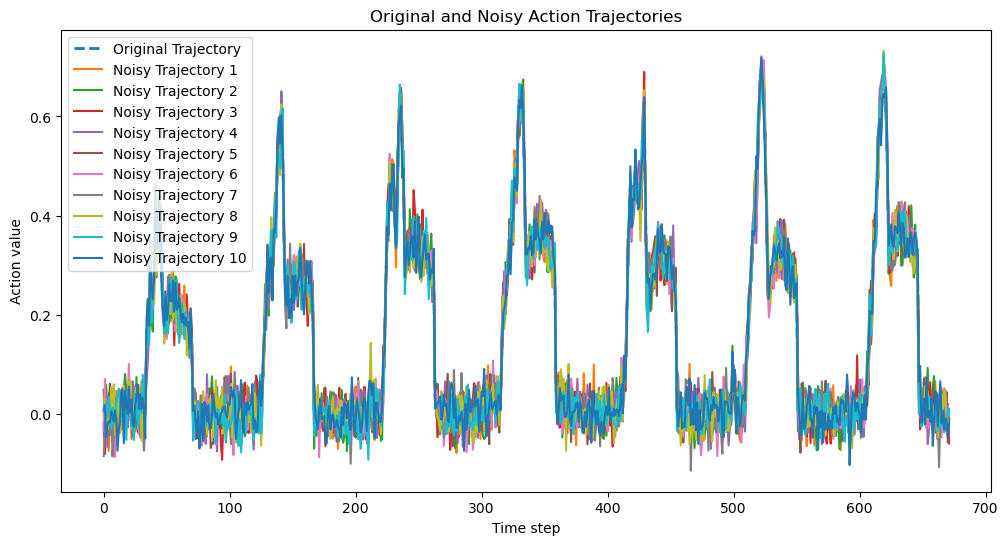

In [173]:
import json
import numpy as np
import matplotlib.pyplot as plt

# Load the action trajectory from a JSON file
# Replace the file path with the path to your JSON file
file_path = 'PH32/u_opt.json'

# Read the JSON file
with open(file_path, 'r') as file:
    data = json.load(file)

# Extract the action trajectory
u_opt = np.array(data['u_opt'])

# Function to add Gaussian noise to the action trajectory
def add_noise_to_trajectory(trajectory, noise_level):
    noise = np.random.normal(0, noise_level, trajectory.shape)
    return trajectory + noise

# Function to create multiple noisy trajectories
def create_noisy_trajectories(original_trajectory, num_trajectories, noise_level):
    return [add_noise_to_trajectory(original_trajectory, noise_level) for _ in range(num_trajectories)]

# Parameters for noise and number of trajectories
num_trajectories = 10  # Number of noisy trajectories to create
noise_level = 0.03  # Standard deviation of Gaussian noise

# Generate noisy trajectories
noisy_trajectories = create_noisy_trajectories(u_opt, num_trajectories, noise_level)

# Plotting the original and noisy trajectories
plt.figure(figsize=(12, 6))
plt.plot(u_opt, label='Original Trajectory', linewidth=2, linestyle='--')
for i, traj in enumerate(noisy_trajectories):
    plt.plot(traj, label=f'Noisy Trajectory {i+1}')
plt.xlabel('Time step')
plt.ylabel('Action value')
plt.title('Original and Noisy Action Trajectories')
plt.legend()
plt.show()

Trajectory saved as noisy_trajectory_1.json
Trajectory saved as noisy_trajectory_2.json
Trajectory saved as noisy_trajectory_3.json
Trajectory saved as noisy_trajectory_4.json
Trajectory saved as noisy_trajectory_5.json
Trajectory saved as noisy_trajectory_6.json
Trajectory saved as noisy_trajectory_7.json
Trajectory saved as noisy_trajectory_8.json
Trajectory saved as noisy_trajectory_9.json
Trajectory saved as noisy_trajectory_10.json


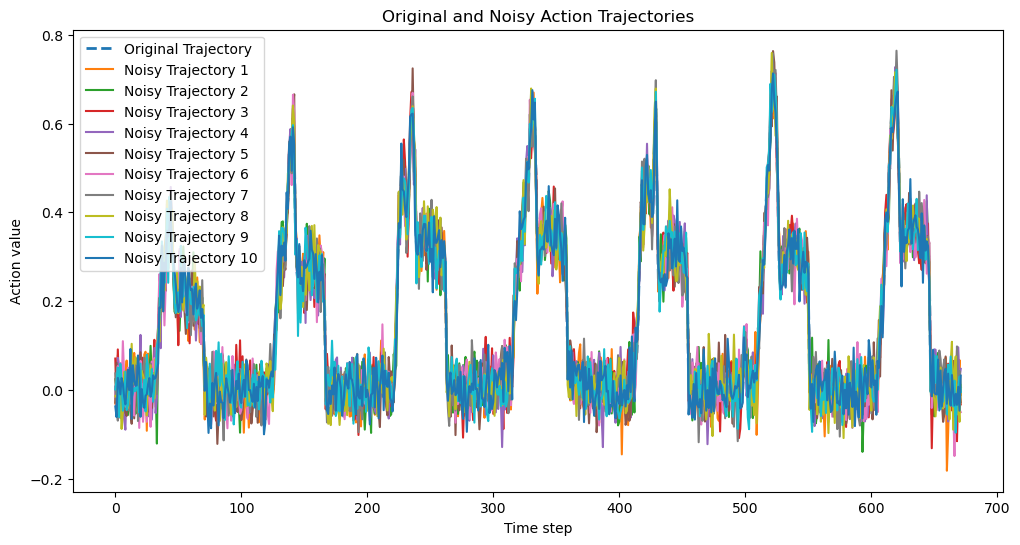

In [146]:
import json
import numpy as np
import matplotlib.pyplot as plt

# Load the action trajectory from a JSON file
# Replace the file path with the path to your JSON file
file_path = 'PH32/u_opt.json'

# Read the JSON file
with open(file_path, 'r') as file:
    data = json.load(file)

# Extract the action trajectory
u_opt = np.array(data['u_opt'])

# Function to add Gaussian noise to the action trajectory
def add_noise_to_trajectory(trajectory, noise_level):
    noise = np.random.normal(0, noise_level, trajectory.shape)
    return trajectory + noise

# Function to create multiple noisy trajectories
def create_noisy_trajectories(original_trajectory, num_trajectories, noise_level):
    return [add_noise_to_trajectory(original_trajectory, noise_level) for _ in range(num_trajectories)]

# Function to save trajectory as a JSON file
def save_trajectory_as_json(trajectory, file_index):
    filename = f"noisy_trajectory_{file_index}.json"
    with open(filename, 'w') as file:
        json.dump({"u_opt": trajectory.tolist()}, file)
    print(f"Trajectory saved as {filename}")

# Parameters for noise and number of trajectories
num_trajectories = 10  # Number of noisy trajectories to create
noise_level = 0.04  # Standard deviation of Gaussian noise

# Generate noisy trajectories
noisy_trajectories = create_noisy_trajectories(u_opt, num_trajectories, noise_level)

# Save each noisy trajectory as a JSON file
for i, traj in enumerate(noisy_trajectories):
    save_trajectory_as_json(traj, i+1)

# Plotting the original and noisy trajectories
plt.figure(figsize=(12, 6))
plt.plot(u_opt, label='Original Trajectory', linewidth=2, linestyle='--')
for i, traj in enumerate(noisy_trajectories):
    plt.plot(traj, label=f'Noisy Trajectory {i+1}')
plt.xlabel('Time step')
plt.ylabel('Action value')
plt.title('Original and Noisy Action Trajectories')
plt.legend()
plt.show()

In [147]:
import json

# Load the original JSON file
original_file_path = 'PH32/u_opt.json'  # Update with your original JSON file path

# Base path for the noisy trajectory files
base_noisy_file_path = 'PH32/noisy_trajectory_{}.json'  # Update with your noisy trajectory file path pattern

# Process for each of the 10 previously saved noisy trajectories
for i in range(1, 11):
    # Construct the file path for the noisy trajectory
    noisy_file_path = base_noisy_file_path.format(i)

    # Read the noisy trajectory JSON file
    with open(noisy_file_path, 'r') as file:
        noisy_data = json.load(file)

    # Read the original JSON file
    with open(original_file_path, 'r') as file:
        original_data = json.load(file)

    # Replace the 'u_opt' in the original data with the noisy trajectory
    original_data['u_opt'] = noisy_data['u_opt']

    # Save the modified data to a new JSON file
    new_file_path = f'new_u_opt_{i}.json'  # The file will be saved with this name
    with open(new_file_path, 'w') as file:
        json.dump(original_data, file)

    print(f"New u_opt_json file saved at {new_file_path}")


New u_opt_json file saved at new_u_opt_1.json
New u_opt_json file saved at new_u_opt_2.json
New u_opt_json file saved at new_u_opt_3.json
New u_opt_json file saved at new_u_opt_4.json
New u_opt_json file saved at new_u_opt_5.json
New u_opt_json file saved at new_u_opt_6.json
New u_opt_json file saved at new_u_opt_7.json
New u_opt_json file saved at new_u_opt_8.json
New u_opt_json file saved at new_u_opt_9.json
New u_opt_json file saved at new_u_opt_10.json
